In [72]:
import matplotlib.pyplot as plt
import numpy as np

#All from perspective of server IE upload is actually server send(client Recieve), download is server receive(client send)

verizonUpload = []
tmobileUpload = []
ethernetUpload = []
att5gUploadRain = []
att5gUploadSun = []

verizonDownload = []
tmobileDownload = []
ethernetDownload = []
att5gDownloadRain = []
att5gDownloadSun = []

verizonLatency = []
tmobileLatency = []
ethernetLatency = []
att5gLatencyRain = []
att5gLatencySun = []


with open('./verizon-lte/upload.txt', 'r') as f:
    for line in f:
        verizonUpload.append(float(line))
f.close()

with open('./verizon-lte/download.txt', 'r') as f:
    for line in f:
        verizonDownload.append(float(line))
f.close()

with open('./verizon-lte/latency.txt', 'r') as f:
    for line in f:
        verizonLatency.append(float(line))
f.close()

with open('./tmobile-lte/upload.txt', 'r') as f:
    for line in f:
        tmobileUpload.append(float(line))
f.close()

with open('./tmobile-lte/download.txt', 'r') as f:
    for line in f:
        tmobileDownload.append(float(line))
f.close()

with open('./tmobile-lte/latency.txt', 'r') as f:
    for line in f:
        tmobileLatency.append(float(line))
f.close()

with open('./ethernet/upload.txt', 'r') as f:
    for line in f:
        ethernetUpload.append(float(line))
f.close()

with open('./ethernet/download.txt', 'r') as f:
    for line in f:
        ethernetDownload.append(float(line))
f.close()

with open('./ethernet/latency.txt', 'r') as f:
    for line in f:
        ethernetLatency.append(float(line))
f.close()
with open('./att-5g/upload.txt', 'r') as f:
    for line in f:
        att5gUploadRain.append(float(line))
f.close()

with open('./att-5g/download.txt', 'r') as f:
    for line in f:
        att5gDownloadRain.append(float(line))
f.close()

with open('./att-5g/latency.txt', 'r') as f:
    for line in f:
        att5gLatencyRain.append(float(line))
f.close()

# with open('./att-5g/upload.txt', 'r') as f:
#     for line in f:
#         att5gUploadSun.append(float(line))
# f.close()

# with open('./att-5g/download.txt', 'r') as f:
#     for line in f:
#         att5gDownloadSun.append(float(line))
# f.close()

# with open('./att-5g/latency.txt', 'r') as f:
#     for line in f:
#         att5gLatencySun.append(float(line))
# f.close()

In [76]:
def plotInHist(v, t, e, a_rain, a_sun, xlab, ylab, title, bins):
    kwargs = dict(histtype='step', stacked=True,
              alpha=0.6)

    plt.hist(v, **kwargs, color='blue', label='Verizon', bins=bins)
    plt.hist(t, **kwargs, color='red', label='T-Mobile', bins=bins)
    plt.hist(e, **kwargs, color='orange', label='Ethernet', bins=bins);
    plt.hist(a_rain, **kwargs, color='magenta', label='AT&T 5G (rain)', bins=bins);
    plt.hist(a_sun, **kwargs, color='lightblue', label='AT&T 5G (sunny)', bins=bins);
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

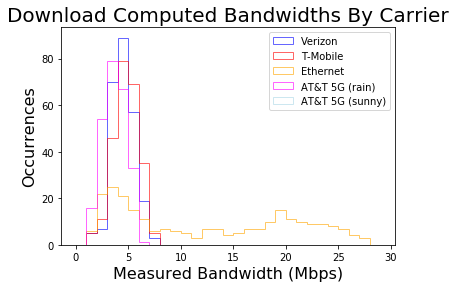

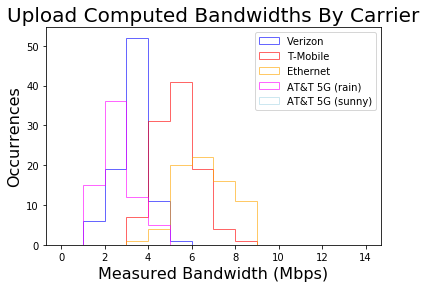

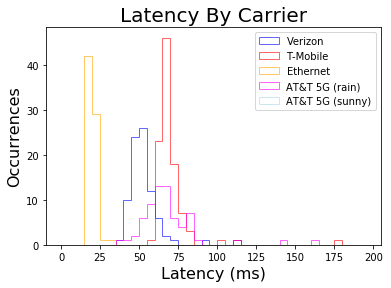

In [77]:
def truncateData(start, end, data):
    return data[start:end]

vUploadTrunc = truncateData(50, 300, verizonUpload)
tUploadTrunc = truncateData(50, 300, tmobileUpload)
eUploadTrunc = truncateData(50, 300, ethernetUpload)
aRainUploadTrunc = truncateData(50, 300, att5gUploadRain)
aSunUploadTrunc = truncateData(50, 300, att5gUploadSun)

vDownloadTrunc = truncateData(50, 300, verizonDownload)
tDownloadTrunc = truncateData(50, 300, tmobileDownload)
eDownloadTrunc = truncateData(50, 300, ethernetDownload)
aRainDownloadTrunc = truncateData(50, 300, att5gDownloadRain)
aSunDownloadTrunc = truncateData(50, 300, att5gDownloadSun)

vLatTrunc = truncateData(50, 300, verizonLatency)
tLatTrunc = truncateData(50, 300, tmobileLatency)
eLatTrunc = truncateData(50, 300, ethernetLatency)
aRainLatTrunc = truncateData(50, 300, att5gLatencyRain)
aSunLatTrunc = truncateData(50, 300, att5gLatencySun)

bins1 = list(range(0, 30, 1)) #for download 
bins2 = list(range(0, 15, 1)) #for upload
bins3 = list(range(0, 200, 5)) #for latency


plotInHist(vUploadTrunc, tUploadTrunc, eUploadTrunc, aRainUploadTrunc, aSunUploadTrunc, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Download Computed Bandwidths By Carrier', bins1)
plotInHist(vDownloadTrunc, tDownloadTrunc, eDownloadTrunc, aRainDownloadTrunc, aSunDownloadTrunc, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Upload Computed Bandwidths By Carrier', bins2)
plotInHist(vLatTrunc, tLatTrunc, eLatTrunc, aRainLatTrunc, aSunLatTrunc, 'Latency (ms)', 'Occurrences', 'Latency By Carrier', bins3)


In [71]:
#Grace Period Graphing for tmobile lte

points = 23

grace_1_upload = np.zeros((points, 3))
grace_1_download = np.zeros((points, 3))
grace_1_latency = np.zeros((points, 3))
grace_10_upload = np.zeros((points, 3))
grace_10_download = np.zeros((points, 3))
grace_10_latency = np.zeros((points, 3))
grace_50_upload = np.zeros((points, 3))
grace_50_download = np.zeros((points, 3))
grace_50_latency = np.zeros((points, 3))

with open('./tmobile-lte/grace-period-1/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][2] = float(line)
        count += 1
f.close()

In [43]:
avg_grace_1_upload = np.mean(grace_1_upload, axis=1)
avg_grace_10_upload = np.mean(grace_10_upload, axis=1)
avg_grace_50_upload = np.mean(grace_50_upload, axis=1)

avg_grace_1_download = np.mean(grace_1_download, axis=1)
avg_grace_10_download = np.mean(grace_10_download, axis=1)
avg_grace_50_download = np.mean(grace_50_download, axis=1)

avg_grace_1_latency = np.mean(grace_1_latency, axis=1)
avg_grace_10_latency = np.mean(grace_10_latency, axis=1)
avg_grace_50_latency = np.mean(grace_50_latency, axis=1)

In [50]:
def plotLines(g1, g10, g50, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1,color='blue', label='\u03BB = 1')
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50');
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

In [51]:
def plotLinesExtra(g1, g1_o, g10, g10_o, g50, g50_o, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1, color='blue', label='\u03BB = 1')
    plt.plot(range(g1_o.shape[0]), g1_o[:, 0], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 1], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 2], color='blue', alpha=0.2)
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g10_o.shape[0]), g10_o[:, 0], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 1], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 2], color='red', alpha=0.2)
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50')
    plt.plot(range(g50_o.shape[0]), g50_o[:, 0], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 1], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 2], color='orange', alpha=0.2)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

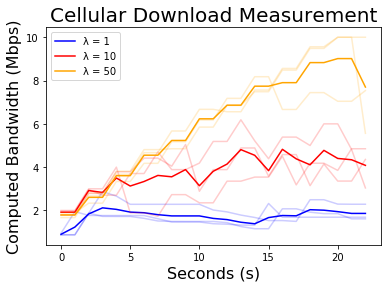

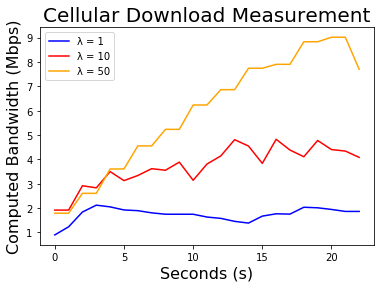

In [52]:
plotLinesExtra(avg_grace_1_upload, grace_1_upload, avg_grace_10_upload, grace_10_upload, avg_grace_50_upload, grace_50_upload, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Download Measurement')
plotLines(avg_grace_1_upload, avg_grace_10_upload, avg_grace_50_upload, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Download Measurement')

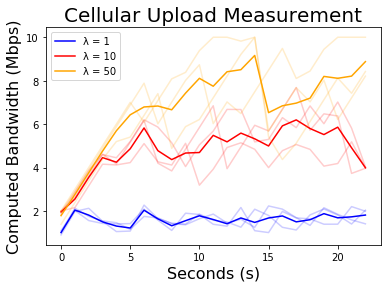

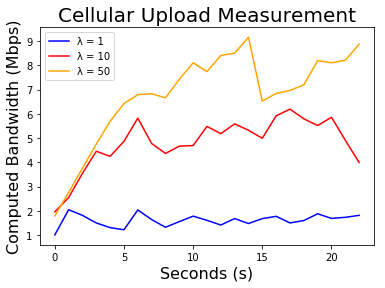

In [53]:
plotLinesExtra(avg_grace_1_download, grace_1_download, avg_grace_10_download, grace_10_download, avg_grace_50_download, grace_50_download, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Upload Measurement')
plotLines(avg_grace_1_download, avg_grace_10_download, avg_grace_50_download, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Upload Measurement')

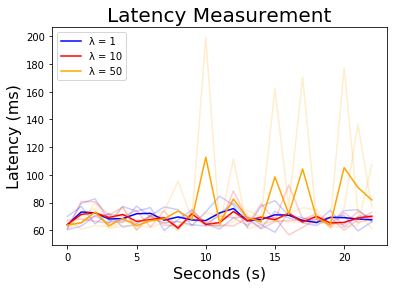

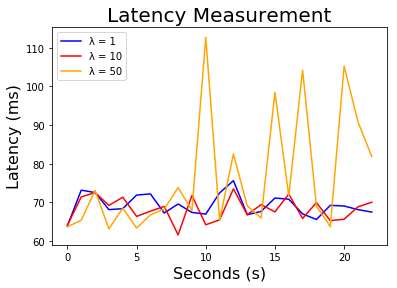

In [54]:
plotLinesExtra(avg_grace_1_latency, grace_1_latency, avg_grace_10_latency, grace_10_latency, avg_grace_50_latency, grace_50_latency, 'Seconds (s)', 'Latency (ms)', 'Latency Measurement')
plotLines(avg_grace_1_latency, avg_grace_10_latency, avg_grace_50_latency, 'Seconds (s)', 'Latency (ms)', 'Latency Measurement')